# 6.4 - Supervised Machine Learning Task

### a) Import Libraries & data

### b) Clean data for analysis

### c) exploring data visually - find variables

### d) generate hypotesis

### e) reshaping variables 

### f) Split data set into training & test set

### g) running linear regression:

- fit model to the training set
- create prediction for y on test set

### h) Plot with regression line on test set + interpretation

### i) checking model performance statistics (MSE & R2), compare üpredicted & actual values

****************************************************************************************************

### a) Import Libraries & data

In [1]:
# a) import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# set path
path = r'C:\Users\rieke\Data Analytics\Achievement 6\02 Data'

In [3]:
path

'C:\\Users\\rieke\\Data Analytics\\Achievement 6\\02 Data'

In [4]:
df = pd.read_csv(os.path.join(path, '02 Prepared Data', 'DF1_renew_clean.csv'), index_col = False)

In [5]:
df.head(5)

,Unnamed: 0,COUNTRY,CODE_TIME,TIME,YEAR,MONTH,MONTH_NAME,PRODUCT,VALUE,DISPLAY_ORDER,yearToDate,share
0,0,Australia,JAN2010,January 2010,2010,1,January,Hydro,990.728,1,16471.891,0.047771
1,1,Australia,JAN2010,January 2010,2010,1,January,Wind,409.469,2,4940.909,0.019744
2,2,Australia,JAN2010,January 2010,2010,1,January,Solar,49.216,3,908.238,0.002373
3,3,Australia,JAN2010,January 2010,2010,1,January,Geothermal,0.083,4,0.996,0.000004
4,4,Australia,JAN2010,January 2010,2010,1,January,Total combustible fuels,19289.730,7,214302.969,0.930108


In [6]:
df = df.drop(columns = ['Unnamed: 0'])

In [7]:
df.head(5)

,COUNTRY,CODE_TIME,TIME,YEAR,MONTH,MONTH_NAME,PRODUCT,VALUE,DISPLAY_ORDER,yearToDate,share
0,Australia,JAN2010,January 2010,2010,1,January,Hydro,990.728,1,16471.891,0.047771
1,Australia,JAN2010,January 2010,2010,1,January,Wind,409.469,2,4940.909,0.019744
2,Australia,JAN2010,January 2010,2010,1,January,Solar,49.216,3,908.238,0.002373
3,Australia,JAN2010,January 2010,2010,1,January,Geothermal,0.083,4,0.996,0.000004
4,Australia,JAN2010,January 2010,2010,1,January,Total combustible fuels,19289.730,7,214302.969,0.930108


### b) Clean data for analysis

In [8]:
df.columns

Index(['COUNTRY', 'CODE_TIME', 'TIME', 'YEAR', 'MONTH', 'MONTH_NAME',
       'PRODUCT', 'VALUE', 'DISPLAY_ORDER', 'yearToDate', 'share'],
      dtype='object')

In [9]:
df.shape

(181915, 11)

In [10]:
# Check for missing values

df.isnull().sum()

COUNTRY          0
CODE_TIME        0
TIME             0
YEAR             0
MONTH            0
MONTH_NAME       0
PRODUCT          0
VALUE            0
DISPLAY_ORDER    0
yearToDate       0
share            0
dtype: int64

In [11]:
# duplicates check 
dups = df.duplicated()

In [12]:
dups.shape # none

(181915,)

C:\Users\rieke\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='VALUE', ylabel='Density'>

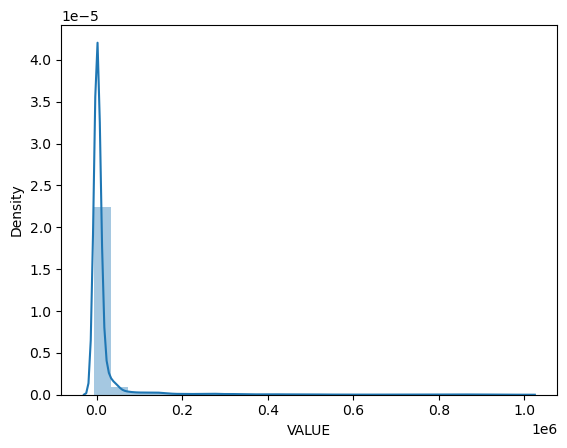

In [13]:
# check for extreme values
sns.distplot(df['VALUE'], bins=25)

In [14]:
df.describe()

,YEAR,MONTH,VALUE,DISPLAY_ORDER,yearToDate,share
count,181915.000000,181915.000000,1.819150e+05,181915.000000,1.819150e+05,181915.000000
mean,2016.456818,6.498145,2.091292e+04,14.418410,2.509544e+05,0.289057
std,3.657532,3.452288,8.584724e+04,7.819235,1.026864e+06,0.427347
min,2010.000000,1.000000,-6.852344e+03,1.000000,-6.667000e+04,-4.649269
25%,2013.000000,3.000000,6.685189e+01,8.000000,8.831870e+02,0.009907
50%,2017.000000,6.000000,7.663990e+02,15.000000,9.558855e+03,0.082530
75%,2020.000000,9.000000,4.989495e+03,21.000000,5.927517e+04,0.511302
max,2022.000000,12.000000,1.001529e+06,27.000000,1.082156e+07,5.649269


In [15]:
# exclude (delete) values <0, because it is unusual that a source is producing negative energy values
df = df[df['VALUE'] > 0] 

In [16]:
df.shape # 17.073 values excluded from file

(164842, 11)

### c) exploring data visually - find variables

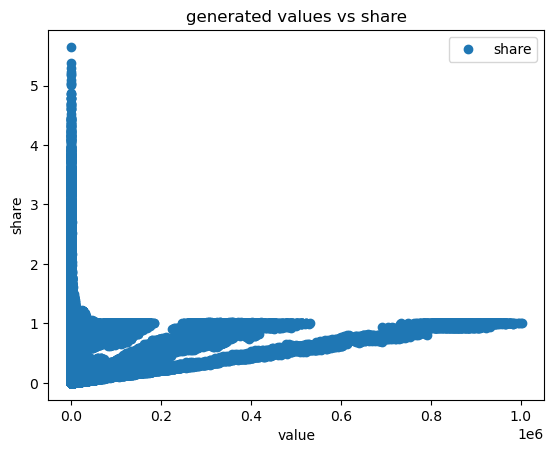

In [17]:
# Create a scatterplot 

df.plot(x = 'VALUE', y='share',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('generated values vs share')  
plt.xlabel('value')  
plt.ylabel('share')  
plt.show()

we know that share is calculated from the total value by country.

### d) generate hypotesis

The more energy productions a Country is having, the higher energy values are produced

### e.1) reshaping variables 

In [18]:
# create dummies on categorical data for regression purpose
X = df[['COUNTRY', 'PRODUCT']]

In [19]:
X = pd.get_dummies(data=X, drop_first=True)
X.head()

,COUNTRY_Australia,COUNTRY_Austria,COUNTRY_Belgium,COUNTRY_Brazil,COUNTRY_Bulgaria,COUNTRY_Canada,COUNTRY_Chile,COUNTRY_Colombia,COUNTRY_Costa Rica,COUNTRY_Croatia,...,PRODUCT_Other renewables,PRODUCT_Other renewables aggregated,PRODUCT_Others,PRODUCT_Renewables,PRODUCT_Solar,PRODUCT_Total combustible fuels,PRODUCT_Total exports,PRODUCT_Total imports,PRODUCT_Used for pumped storage,PRODUCT_Wind
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [20]:
y = df['VALUE']
y.head()

0      990.728
1      409.469
2       49.216
3        0.083
4    19289.730
Name: VALUE, dtype: float64

### e.2) reshaping with group by

In [21]:
df1 = df.groupby('COUNTRY').agg({'PRODUCT':'count', 'VALUE':'mean'})\
.rename(columns={'PRODUCT':'count_of_sources','VALUE':'mean_value'})\
.reset_index()
print (df1)

                COUNTRY  count_of_sources     mean_value
0             Argentina              1757    4154.240981
1             Australia              3042    7173.119007
2               Austria              3781    1655.600531
3               Belgium              3795    1976.940823
4                Brazil              1800   16169.329967
5              Bulgaria              2283     953.597112
6                Canada              3997   12823.292527
7                 Chile              2915    2228.540940
8              Colombia              2155    2056.573520
9            Costa Rica               463     332.667660
10              Croatia              2022     424.329304
11               Cyprus              1392     205.553020
12       Czech Republic              3900    1823.639557
13              Denmark              3321     953.832905
14              Estonia              3272     299.961576
15              Finland              3584    1838.631941
16               France        

In [22]:
# deleting geographical region summaries to exclude outliers and see the single countries only
list1 = ['IEA Total', 'OECD Americas', 'OECD Asia Oceania', 'OECD Europe', 'OECD Total']

In [23]:
print(df1[df1.COUNTRY.isin(list1) == False])

                COUNTRY  count_of_sources    mean_value
0             Argentina              1757   4154.240981
1             Australia              3042   7173.119007
2               Austria              3781   1655.600531
3               Belgium              3795   1976.940823
4                Brazil              1800  16169.329967
5              Bulgaria              2283    953.597112
6                Canada              3997  12823.292527
7                 Chile              2915   2228.540940
8              Colombia              2155   2056.573520
9            Costa Rica               463    332.667660
10              Croatia              2022    424.329304
11               Cyprus              1392    205.553020
12       Czech Republic              3900   1823.639557
13              Denmark              3321    953.832905
14              Estonia              3272    299.961576
15              Finland              3584   1838.631941
16               France              4181  10368

In [25]:
df1.to_excel(os.path.join(path, '02 Prepared Data', 'grouped data 2010-2022.xlsx'))

### f) Split data set into training & test set

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(115389, 77)
(49453, 77)
(115389,)
(49453,)


### g) running linear regression

In [22]:
# create regression object
model = LinearRegression()

# fit regression object
model.fit(X_train,y_train)

LinearRegression()

In [23]:
# print the intercept
print(model.intercept_)

-1813.250899237435


In [24]:
# create prediction for y
predictions = model.predict(X_test)
predictions

array([  7999.50566388, -17336.7467931 ,  -2830.35525063, ...,
       -11400.05811692, 119579.50166839,  73454.04559511])

### h) Plot with regression line on test set + interpretation

C:\Users\rieke\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='VALUE'>

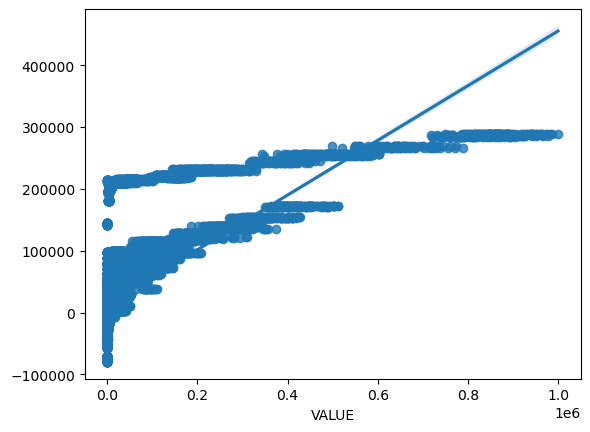

In [25]:
sns.regplot(y_test,predictions)

#### Interpretation

the regression line is not a good fit to the data, what might depend on the used dummies for the involved categorical data

### i) checking model performance statistics (MSE & R2), compare predicted & actual values

In [26]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, predictions) # This is the mean squared error
r2 = r2_score(y_test, predictions) # This is the R2 score. 

In [27]:
# Print the model summary statistics. 

print('Slope:' ,model.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [ 5.41346813e+03  5.60535473e+03  4.91219743e+03  1.37462536e+04
  4.06923933e+03  1.84178066e+04 -1.12282389e+03 -5.22266574e+02
  5.04299441e+02  1.23251314e+03 -6.40288396e+03  4.71357602e+03
 -1.34496258e+01 -6.23367205e+02  3.38956691e+03  1.85845737e+04
  1.81266985e+04  1.86685519e+03  2.92943385e+03  2.31456701e+05
 -5.47494552e+03  3.99369933e+04  1.04702278e+03  1.12748107e+04
  2.92476675e+04  1.71279483e+04 -4.05570322e+03  1.61884067e+03
 -3.24219008e+02 -7.63488895e+03  1.00052911e+04  4.01179008e+03
  7.21242078e+02 -3.02800293e+03  5.24208668e+03  1.17708823e+05
  5.10008840e+04  8.42867283e+04  2.34207604e+05  6.36842010e+03
  4.64059054e+03  8.76742967e+03  8.77870820e+02  8.67247633e+02
  3.12591358e+03  1.69725148e+03  9.80523166e+03  5.18584870e+03
  2.85817626e+03  1.26856476e+04  9.95130900e+04 -1.94349109e+04
 -1.61533612e+04  5.68494899e+04 -1.85215877e+04  5.44457597e+04
  2.34124722e+04 -4.97282990e+04 -1.01560163e+04  1.30860763e+04
 -8.83967116e+02  

In [28]:
predictions

array([  7999.50566388, -17336.7467931 ,  -2830.35525063, ...,
       -11400.05811692, 119579.50166839,  73454.04559511])

In [29]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
data.head(30)

,Actual,Predicted
156147,2516.107864,7999.505664
123984,122.100732,-17336.746793
32913,798.049000,-2830.355251
107032,1107.152604,-11370.409057
161598,4712.347626,193765.861001
34676,144.589000,-23945.496643
113324,1556.162980,23959.155812
130167,516.272652,-13327.173252
142322,27812.034454,40040.081299
179955,826.836257,24988.788195


all visual as well as statistical details are far, far away from beeing a good fit 
ideas to improve the model
- include latitude & longitude for hypothesis
' The closer a country is to the Equator, the higher its produced energy value'

- analyse kinds of energy production (here: PRODUCTS) seperately to go more in detail about the Countries and their energy-sourcing product of best fit for their geographical position